In [44]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import sys
import time
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datos/MMM_data.csv')

In [ ]:
data.head(9)

,wk_strt_dt,yr_nbr,qtr_nbr,prd,wk_nbr,wk_in_yr_nbr,mdip_dm,mdip_inst,mdip_nsp,mdip_auddig,...,seas_prd_12,seas_week_40,seas_week_41,seas_week_42,seas_week_43,seas_week_44,seas_week_45,seas_week_46,seas_week_47,seas_week_48
0,2014-08-03,2014,3,7,1,27,4863885,29087520,2421933,692315,...,0,0,0,0,0,0,0,0,0,0
1,2014-08-10,2014,3,7,2,28,20887502,8345120,3984494,475810,...,0,0,0,0,0,0,0,0,0,0
2,2014-08-17,2014,3,7,3,29,11097724,17276800,1846832,784732,...,0,0,0,0,0,0,0,0,0,0
3,2014-08-24,2014,3,7,4,30,1023446,18468480,2394834,1032301,...,0,0,0,0,0,0,0,0,0,0
4,2014-08-31,2014,3,8,1,31,21109811,26659920,3312008,400456,...,0,0,0,0,0,0,0,0,0,0
5,2014-09-07,2014,3,8,2,32,5965633,6255666,3215276,461272,...,0,0,0,0,0,0,0,0,0,0
6,2014-09-14,2014,3,8,3,33,10034343,4232000,1365872,497614,...,0,0,0,0,0,0,0,0,0,0
7,2014-09-21,2014,3,8,4,34,12764686,15474013,2024228,270547,...,0,0,0,0,0,0,0,0,0,0
8,2014-09-28,2014,3,8,5,35,11745748,7490000,1715439,294330,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = data.iloc[:, 6:35]

In [ ]:

df1.head()


,mdip_dm,mdip_inst,mdip_nsp,mdip_auddig,mdip_audtr,mdip_vidtr,mdip_viddig,mdip_so,mdip_on,mdip_em,...,mdsp_viddig,mdsp_so,mdsp_on,mdsp_sem,sales,me_ics_all,me_gas_dpg,st_ct,mrkdn_valadd_edw,mrkdn_pdm
0,4863885,29087520,2421933,692315,37778097,10038746,2111112,0,3271007,1514755,...,45397.90,0.0,61364.75,355954.51,72051457.64,82.5,3.595,716.285714,0.0,0.368029
1,20887502,8345120,3984494,475810,12063657,9847977,587184,0,4260715,2234569,...,2903.36,0.0,132643.90,336306.72,78794770.54,82.5,3.582,716.428571,0.0,0.360911
2,11097724,17276800,1846832,784732,5770115,7235336,1015658,0,4405992,1616990,...,8110.48,0.0,76741.27,344787.96,70071185.56,82.5,3.549,717.000000,0.0,0.344832
3,1023446,18468480,2394834,1032301,12174000,8625122,2149160,0,6638320,1897998,...,6516.22,0.0,193043.55,365495.11,68642464.59,82.5,3.532,717.000000,0.0,0.356973
4,21109811,26659920,3312008,400456,31656134,19785657,2408661,0,4347752,2569158,...,19381.12,0.0,249612.89,401789.35,86190784.65,84.6,3.536,717.000000,0.0,0.359990


In [ ]:
df1.describe()

,mdip_dm,mdip_inst,mdip_nsp,mdip_auddig,mdip_audtr,mdip_vidtr,mdip_viddig,mdip_so,mdip_on,mdip_em,...,mdsp_viddig,mdsp_so,mdsp_on,mdsp_sem,sales,me_ics_all,me_gas_dpg,st_ct,mrkdn_valadd_edw,mrkdn_pdm
count,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,...,209.000000,209.000000,209.000000,2.090000e+02,2.090000e+02,209.000000,209.000000,209.000000,209.000000,209.000000
mean,9.544510e+06,1.247717e+07,1.616957e+06,1.002816e+06,2.295103e+07,9.846007e+06,1.096360e+06,1.382028e+07,4.742089e+06,3.585528e+06,...,18495.923349,102010.544498,215863.998038,6.261338e+05,1.080543e+08,93.866029,2.570196,658.980178,0.348099,0.337449
std,8.293082e+06,1.024959e+07,2.203341e+06,8.122848e+05,1.567124e+07,9.254274e+06,1.247631e+06,1.091767e+07,2.669165e+06,1.467660e+06,...,17093.178098,95765.738144,124662.993635,4.981457e+05,5.461240e+07,4.211813,0.345152,45.644922,0.098327,0.017785
min,0.000000e+00,4.853300e+04,0.000000e+00,1.561800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.028230e+05,1.446695e+06,...,0.000000,0.000000,40324.230000,1.997579e+05,4.531651e+07,82.500000,1.834000,599.000000,0.000000,0.308796
25%,2.087021e+06,5.304240e+06,2.542340e+05,4.577220e+05,1.236705e+07,4.378348e+06,3.931700e+05,4.305911e+06,2.893497e+06,2.416255e+06,...,6840.090000,35081.440000,125161.210000,3.559545e+05,6.970993e+07,91.200000,2.345000,600.000000,0.338457,0.321316
50%,7.664954e+06,8.911466e+06,8.870720e+05,8.061170e+05,1.910160e+07,7.562079e+06,8.357480e+05,1.381069e+07,4.100627e+06,3.452070e+06,...,12991.090000,70799.440000,186763.140000,4.855040e+05,9.955665e+07,94.700000,2.497000,666.000000,0.360695,0.338464
75%,1.533852e+07,1.786920e+07,2.248483e+06,1.344765e+06,2.956004e+07,1.139192e+07,1.298726e+06,1.974306e+07,6.108048e+06,4.431058e+06,...,24837.910000,143463.910000,281687.620000,6.920217e+05,1.194684e+08,97.000000,2.767000,701.000000,0.389230,0.351438
max,3.979871e+07,6.545146e+07,1.553181e+07,5.418819e+06,9.066538e+07,6.582956e+07,1.078819e+07,5.882166e+07,1.394427e+07,8.614296e+06,...,104352.440000,573355.550000,695750.180000,3.134565e+06,3.515980e+08,101.400000,3.595000,719.000000,0.512255,0.372676


In [ ]:
df1.dtypes

mdip_dm               int64
mdip_inst             int64
mdip_nsp              int64
mdip_auddig           int64
mdip_audtr            int64
mdip_vidtr            int64
mdip_viddig           int64
mdip_so               int64
mdip_on               int64
mdip_em               int64
mdip_sms              int64
mdip_aff              int64
mdip_sem              int64
mdsp_dm             float64
mdsp_inst           float64
mdsp_nsp            float64
mdsp_auddig         float64
mdsp_audtr          float64
mdsp_vidtr          float64
mdsp_viddig         float64
mdsp_so             float64
mdsp_on             float64
mdsp_sem            float64
sales               float64
me_ics_all          float64
me_gas_dpg          float64
st_ct               float64
mrkdn_valadd_edw    float64
mrkdn_pdm           float64
dtype: object

In [ ]:
# Splitting predictor data and target data:
x = df1.drop(['sales'], axis = 1)
y = df1.sales

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Fitting the Logistic Regression model
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
LR_model = LinearRegression()

In [ ]:
LR_model = Pipeline([
    ("Reg", LinearRegression())])

In [ ]:
# Fitting the Logistic Regression model
LR_model.fit(X_train, y_train)

Pipeline(steps=[('Reg', LinearRegression())])

In [ ]:
predictions= LR_model.predict(X_test)

In [ ]:
# Crear un dataframe para las predicciones
df_predictions = pd.DataFrame(predictions, columns=['Predictions'])

# Crear un dataframe para las verdaderas etiquetas
df_true = pd.DataFrame( y_test.values, columns=['True Labels'])

# Concatenar ambos dataframes
result = pd.concat([df_true, df_predictions], axis=1)


In [ ]:
# Seleccionar las columnas mdsp_ de xtest
mdsp_columns = X_test.filter(regex='mdsp_')

# Concatenar el dataframe mdsp_columns, df_true y df_predictions
result = pd.concat([mdsp_columns.reset_index(drop=True), df_true, df_predictions], axis=1)


In [ ]:
result.head()

,mdsp_dm,mdsp_inst,mdsp_nsp,mdsp_auddig,mdsp_audtr,mdsp_vidtr,mdsp_viddig,mdsp_so,mdsp_on,mdsp_sem,True Labels,Predictions
0,854607.36,63831.51,409654.69,2662.88,81525.47,158491.68,23496.23,62219.89,102810.14,389381.22,6.474505e+07,8.414162e+07
1,974373.19,75091.86,43385.67,5648.40,176407.68,328126.91,87157.59,285339.89,304305.37,1074628.03,9.080414e+07,1.085561e+08
2,1203379.72,42651.45,177216.46,1803.28,92602.41,132866.08,14608.69,45194.35,186111.30,318500.57,1.134410e+08,9.127417e+07
3,2878.35,46294.04,144.40,4594.52,217923.89,193193.35,28235.47,196400.61,269152.14,463744.06,1.174966e+08,9.222416e+07
4,1594548.49,90190.54,200693.89,2709.81,118363.54,115539.39,10200.25,35081.44,224793.47,436150.92,1.231708e+08,8.575449e+07


In [ ]:
# Crear un DataFrame para almacenar los resultados por cada variable de mdsp_
mdsp_results = pd.DataFrame()

# Calcular los resultados por cada variable de mdsp_
for col in mdsp_columns.columns:
    temp_df = result[['True Labels', 'Predictions', col]]
    mdsp_results[col] = [temp_df[temp_df[col] != 0]['True Labels'].mean(), temp_df[temp_df[col] != 0]['Predictions'].mean()]

# Transponer el DataFrame para facilitar la lectura
mdsp_results = mdsp_results.transpose()

# Nombrar las columnas
mdsp_results.columns = ['True Labels Mean', 'Predictions Mean']




In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Verificar las columnas presentes en el DataFrame resultante
print(result.columns)


Index(['mdsp_dm', 'mdsp_inst', 'mdsp_nsp', 'mdsp_auddig', 'mdsp_audtr',
       'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so', 'mdsp_on', 'mdsp_sem',
       'True Labels', 'Predictions'],
      dtype='object')


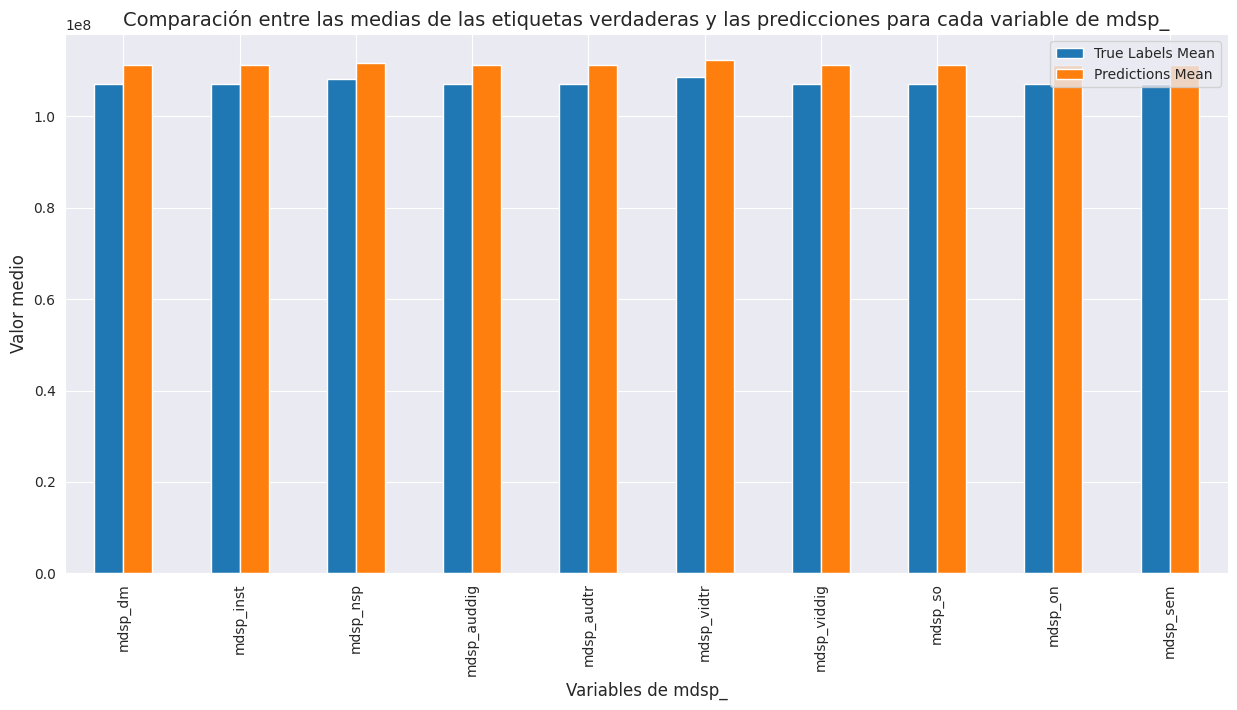

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
mdsp_results.plot(kind='bar', figsize=(15,7))

# Añadir título y etiquetas a los ejes
plt.title('Comparación entre las medias de las etiquetas verdaderas y las predicciones para cada variable de mdsp_', fontsize=14)
plt.xlabel('Variables de mdsp_', fontsize=12)
plt.ylabel('Valor medio', fontsize=12)

# Mostrar el gráfico
plt.show()


In [ ]:
mean_absolute_percentage_error(y_test, predictions)

0.29283951302516253

In [ ]:
LR_model["Reg"].coef_

array([ 2.33870673e-01, -4.85465748e-01,  5.09653540e+00,  7.13471794e+00,
        3.49653579e-01,  1.70167740e+00, -4.34781651e-01, -6.85633212e-01,
        2.53697263e+00,  1.57560654e+00, -6.55775880e+01, -5.23848629e+00,
        1.81472787e+02,  1.96312102e+00,  1.75403816e+02,  3.57703185e+00,
       -1.21062935e+03, -1.28129489e+02,  1.49668075e+01,  1.38069898e+02,
        6.00851607e+00,  1.50030698e+00,  1.13990674e+00,  7.16559439e+05,
       -4.57267736e+06, -7.94360461e+04, -2.87708262e+07,  1.75471685e+08])

In [ ]:
LR_model["Reg"].intercept_

-22589467.55167353

In [ ]:
# Calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions)


In [ ]:
mape

29.283951302516254

In [ ]:
df1.head()

,mdip_dm,mdip_inst,mdip_nsp,mdip_auddig,mdip_audtr,mdip_vidtr,mdip_viddig,mdip_so,mdip_on,mdip_em,...,mdsp_viddig,mdsp_so,mdsp_on,mdsp_sem,sales,me_ics_all,me_gas_dpg,st_ct,mrkdn_valadd_edw,mrkdn_pdm
0,4863885,29087520,2421933,692315,37778097,10038746,2111112,0,3271007,1514755,...,45397.90,0.0,61364.75,355954.51,72051457.64,82.5,3.595,716.285714,0.0,0.368029
1,20887502,8345120,3984494,475810,12063657,9847977,587184,0,4260715,2234569,...,2903.36,0.0,132643.90,336306.72,78794770.54,82.5,3.582,716.428571,0.0,0.360911
2,11097724,17276800,1846832,784732,5770115,7235336,1015658,0,4405992,1616990,...,8110.48,0.0,76741.27,344787.96,70071185.56,82.5,3.549,717.000000,0.0,0.344832
3,1023446,18468480,2394834,1032301,12174000,8625122,2149160,0,6638320,1897998,...,6516.22,0.0,193043.55,365495.11,68642464.59,82.5,3.532,717.000000,0.0,0.356973
4,21109811,26659920,3312008,400456,31656134,19785657,2408661,0,4347752,2569158,...,19381.12,0.0,249612.89,401789.35,86190784.65,84.6,3.536,717.000000,0.0,0.359990


In [ ]:
# Crear un DataFrame para almacenar los resultados de ROAS
roas_results = pd.DataFrame()

# Calcular el ROAS para cada canal
for col in mdsp_columns.columns:
    roas_results[col] = result[col] / df1['sales']

# Ver los primeros registros del DataFrame de ROAS
print(roas_results.head())


    mdsp_dm  mdsp_inst  mdsp_nsp  mdsp_auddig  mdsp_audtr  mdsp_vidtr  \
0  0.011861   0.000886  0.005686     0.000037    0.001131    0.002200   
1  0.012366   0.000953  0.000551     0.000072    0.002239    0.004164   
2  0.017174   0.000609  0.002529     0.000026    0.001322    0.001896   
3  0.000042   0.000674  0.000002     0.000067    0.003175    0.002814   
4  0.018500   0.001046  0.002328     0.000031    0.001373    0.001341   

   mdsp_viddig   mdsp_so   mdsp_on  mdsp_sem  
0     0.000326  0.000864  0.001427  0.005404  
1     0.001106  0.003621  0.003862  0.013638  
2     0.000208  0.000645  0.002656  0.004545  
3     0.000411  0.002861  0.003921  0.006756  
4     0.000118  0.000407  0.002608  0.005060  


In [ ]:
# Calcular el ROAS en porcentaje para cada canal
roas_results_percentage = roas_results.mean() * 100

# Ver los resultados
print(roas_results_percentage)


mdsp_dm        0.792256
mdsp_inst      0.092988
mdsp_nsp       0.265144
mdsp_auddig    0.004467
mdsp_audtr     0.139329
mdsp_vidtr     0.178610
mdsp_viddig    0.019735
mdsp_so        0.121668
mdsp_on        0.234684
mdsp_sem       0.671001
dtype: float64


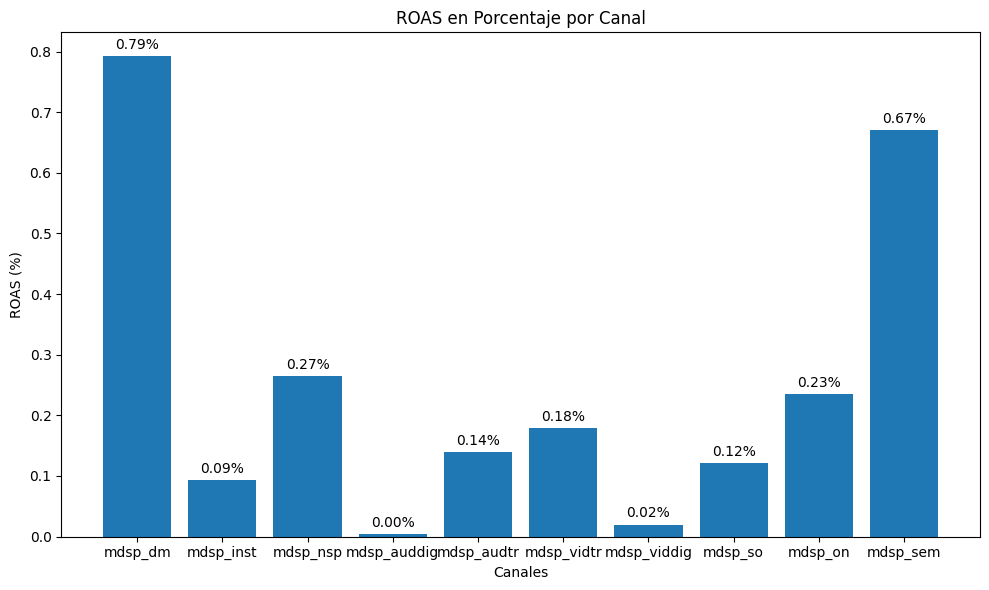

In [ ]:
import matplotlib.pyplot as plt

# Calcular el ROAS en porcentaje para cada canal
roas_results_percentage = roas_results.mean() * 100

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener los nombres de los canales
canales = roas_results_percentage.index

# Obtener los valores de ROAS en porcentaje
porcentajes = roas_results_percentage.values

# Crear el gráfico de barras
barplot = ax.bar(canales, porcentajes)

# Añadir etiquetas de porcentaje a las barras
for rect in barplot:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Añadir etiquetas a los ejes
ax.set_xlabel('Canales')
ax.set_ylabel('ROAS (%)')
ax.set_title('ROAS en Porcentaje por Canal')

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()


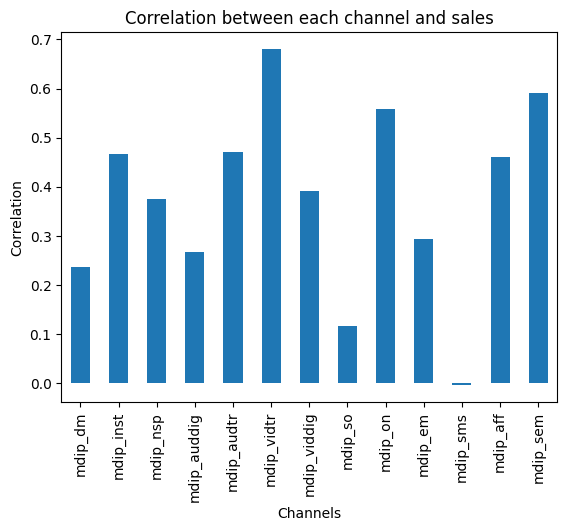

In [ ]:
# Calcular correlación entre impresiones y ventas
corr = df1.filter(regex='mdip_').apply(lambda x: x.corr(df1['sales']))
corr = corr.to_frame(name='Correlation')

# Visualizar la correlación
corr.plot(kind='bar', legend=False)
plt.title('Correlation between each channel and sales')
plt.xlabel('Channels')
plt.ylabel('Correlation')
plt.show()


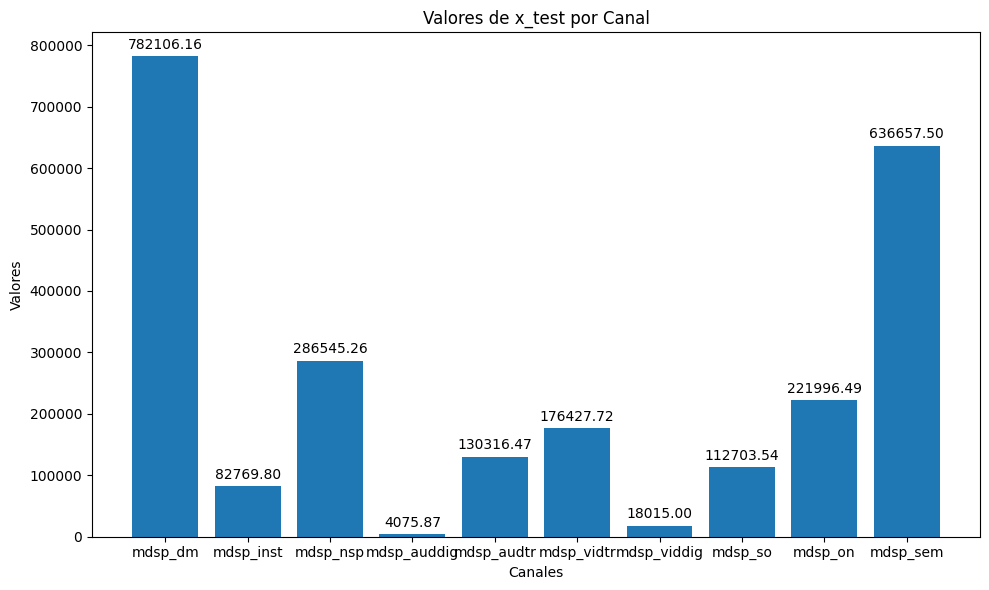

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener los nombres de los canales
canales = mdsp_columns.columns

# Obtener los valores de x_test
valores = X_test[mdsp_columns.columns].mean().values

# Crear el gráfico de barras
barplot = ax.bar(canales, valores)

# Añadir etiquetas de valores a las barras
for rect in barplot:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Añadir etiquetas a los ejes
ax.set_xlabel('Canales')
ax.set_ylabel('Valores')
ax.set_title('Valores de x_test por Canal')

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [50]:
X_test.columns

Index(['mdip_dm', 'mdip_inst', 'mdip_nsp', 'mdip_auddig', 'mdip_audtr',
       'mdip_vidtr', 'mdip_viddig', 'mdip_so', 'mdip_on', 'mdip_em',
       'mdip_sms', 'mdip_aff', 'mdip_sem', 'mdsp_dm', 'mdsp_inst', 'mdsp_nsp',
       'mdsp_auddig', 'mdsp_audtr', 'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so',
       'mdsp_on', 'mdsp_sem', 'me_ics_all', 'me_gas_dpg', 'st_ct',
       'mrkdn_valadd_edw', 'mrkdn_pdm'],
      dtype='object')

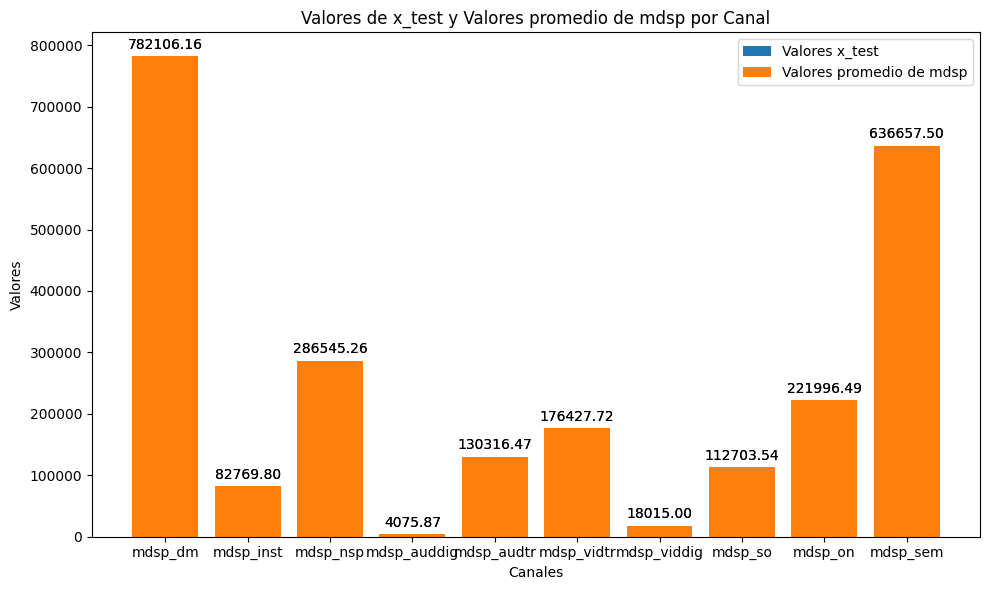

In [60]:
import matplotlib.pyplot as plt

# Obtener los nombres de las columnas originales de mdsp en mdsp_columns
mdsp_columns_originales = ['mdsp_dm', 'mdsp_inst', 'mdsp_nsp',
       'mdsp_auddig', 'mdsp_audtr', 'mdsp_vidtr', 'mdsp_viddig', 'mdsp_so',
       'mdsp_on', 'mdsp_sem']

# Obtener los valores promedio de x_test para las columnas correspondientes a mdsp
valores_x_test = X_test[mdsp_columns_originales].mean().values

# Obtener los valores promedio de las columnas originales de mdsp en mdsp_columns
valores_mdsp = mdsp_columns.loc[:, mdsp_columns_originales].mean().values

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener los nombres de los canales
canales = mdsp_columns_originales

# Crear el gráfico de barras para x_test
barplot_x_test = ax.bar(canales, valores_x_test, label='Valores x_test')

# Crear el gráfico de barras para los valores promedio de mdsp
barplot_mdsp = ax.bar(canales, valores_mdsp, label='Valores promedio de mdsp')

# Añadir etiquetas de valores a las barras de x_test
for rect in barplot_x_test:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Añadir etiquetas de valores a las barras de mdsp
for rect in barplot_mdsp:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Añadir etiquetas a los ejes
ax.set_xlabel('Canales')
ax.set_ylabel('Valores')
ax.set_title('Valores de x_test y Valores promedio de mdsp por Canal')
ax.legend()

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Crear un nuevo DataFrame solo con las columnas mdsp
df_mdsp = df1[mdsp_columns_originales].copy()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_mdsp, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Realizar las predicciones para los conjuntos de entrenamiento y prueba
predicciones_train = regression_model.predict(X_train)
predicciones_test = regression_model.predict(X_test)

# Crear DataFrames con las predicciones
df_predicciones_train = pd.DataFrame(predicciones_train, columns=['Predictions'])
df_predicciones_test = pd.DataFrame(predicciones_test, columns=['Predictions'])

# Calcular los porcentajes para X_train
total_predicho_train = df_predicciones_train['Predictions'].sum()
porcentajes_predichos_train = df_predicciones_train['Predictions'] / total_predicho_train * 100

# Calcular los porcentajes para X_test
total_predicho_test = df_predicciones_test['Predictions'].sum()
porcentajes_predichos_test = df_predicciones_test['Predictions'] / total_predicho_test * 100

# Imprimir los porcentajes predichos para X_train
print("Porcentajes predichos para X_train:")
print(porcentajes_predichos_train)

# Imprimir los porcentajes predichos para X_test
print("Porcentajes predichos para X_test:")
print(porcentajes_predichos_test)


Porcentajes predichos para X_train:
0      0.421532
1      0.447321
2      0.547967
3      1.284897
4      0.515040
         ...   
162    0.419339
163    0.740169
164    0.471662
165    0.441200
166    0.413409
Name: Predictions, Length: 167, dtype: float64
Porcentajes predichos para X_test:
0     2.136890
1     3.136766
2     1.743768
3     1.889675
4     2.009828
5     1.550374
6     2.521023
7     1.305671
8     2.139300
9     2.253549
10    1.783940
11    1.266003
12    1.685960
13    1.464705
14    2.966824
15    3.352979
16    2.243222
17    5.827139
18    1.994959
19    1.571970
20    1.964986
21    2.084681
22    2.024076
23    2.085817
24    2.666999
25    1.848749
26    1.830883
27    2.459008
28    6.054339
29    4.795960
30    1.904860
31    4.923301
32    1.872722
33    2.437727
34    2.200468
35    1.989545
36    1.392773
37    2.432272
38    1.594637
39    1.538044
40    2.550561
41    2.503046
Name: Predictions, dtype: float64


In [95]:
# Obtener las predicciones para X_test
predictions = regression_model.predict(X_test)

# Crear un DataFrame con las predicciones
df_predictions = pd.DataFrame(predictions, columns=['Predictions'])

# Calcular los porcentajes para las columnas de mdsp en X_test
mdsp_columns_values = X_test[mdsp_columns_originales].mean()
valor_predicho = df_predictions.loc[0, 'Predictions']
porcentajes = mdsp_columns_values / sum(mdsp_columns_values) * valor_predicho

# Crear una tabla con los porcentajes
tabla_porcentajes = pd.DataFrame(porcentajes, columns=['Porcentaje Predicho'])

# Mostrar la tabla de porcentajes
print(tabla_porcentajes)


             Porcentaje Predicho
mdsp_dm             3.203444e+07
mdsp_inst           3.390185e+06
mdsp_nsp            1.173666e+07
mdsp_auddig         1.669445e+05
mdsp_audtr          5.337658e+06
mdsp_vidtr          7.226338e+06
mdsp_viddig         7.378800e+05
mdsp_so             4.616247e+06
mdsp_on             9.092798e+06
mdsp_sem            2.607698e+07


In [97]:
# Calcular los porcentajes de cada columna de mdsp
porcentajes = (mdsp_columns_values / sum(mdsp_columns_values)) * 100

# Crear una tabla con los porcentajes
tabla_porcentajes = pd.DataFrame(porcentajes, columns=['Porcentaje Predicho'])

# Convertir los porcentajes a formato de cadena con el símbolo %
tabla_porcentajes['Porcentaje Predicho'] = tabla_porcentajes['Porcentaje Predicho'].map('{:.2f}% del valor total predicho'.format)

# Mostrar la tabla de porcentajes
print(tabla_porcentajes)


                         Porcentaje Predicho
mdsp_dm      31.90% del valor total predicho
mdsp_inst     3.38% del valor total predicho
mdsp_nsp     11.69% del valor total predicho
mdsp_auddig   0.17% del valor total predicho
mdsp_audtr    5.32% del valor total predicho
mdsp_vidtr    7.20% del valor total predicho
mdsp_viddig   0.73% del valor total predicho
mdsp_so       4.60% del valor total predicho
mdsp_on       9.06% del valor total predicho
mdsp_sem     25.97% del valor total predicho


In [93]:
# Seleccionar las columnas correctas para el cálculo de los porcentajes
mdsp_columns_values = df_mdsp.mean()

# Obtener el valor predicho
valor_predicho = 100

# Calcular el porcentaje de cada columna de mdsp
porcentajes = mdsp_columns_values / sum(mdsp_columns_values) * valor_predicho

# Crear una tabla con los porcentajes
tabla_porcentajes = pd.DataFrame(porcentajes, columns=['Porcentaje Predicho'])

# Mostrar la tabla de porcentajes
print(tabla_porcentajes)



             Porcentaje Predicho
mdsp_dm                32.260263
mdsp_inst               3.383466
mdsp_nsp               10.837447
mdsp_auddig             0.163664
mdsp_audtr              5.219691
mdsp_vidtr              7.158981
mdsp_viddig             0.787423
mdsp_so                 4.342873
mdsp_on                 9.189931
mdsp_sem               26.656260


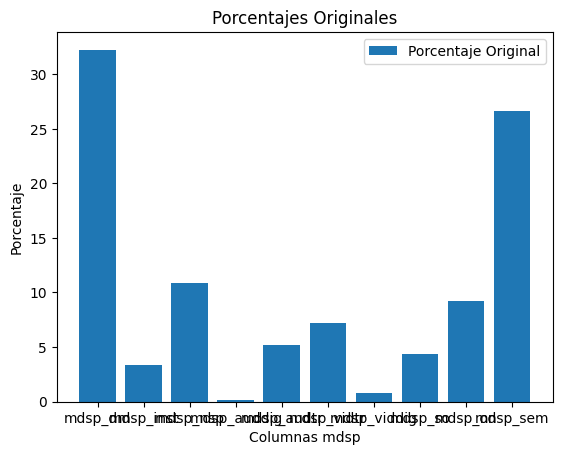

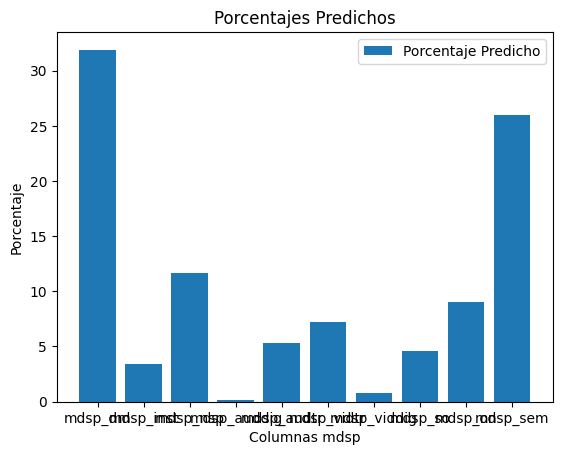

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los valores de las columnas originales de mdsp
valores_mdsp_originales = df1[mdsp_columns_originales].mean()

# Calcular los porcentajes de los valores originales de mdsp
porcentajes_originales = (valores_mdsp_originales / sum(valores_mdsp_originales)) * 100

# Crear una tabla con los porcentajes originales
tabla_porcentajes_originales = pd.DataFrame(porcentajes_originales, columns=['Porcentaje Original'])

# Calcular los porcentajes de cada columna de mdsp
porcentajes_predichos = (mdsp_columns_values / sum(mdsp_columns_values)) * 100

# Crear una tabla con los porcentajes predichos
tabla_porcentajes_predichos = pd.DataFrame(porcentajes_predichos, columns=['Porcentaje Predicho'])

# Graficar los porcentajes originales
fig, ax = plt.subplots()
ax.bar(tabla_porcentajes_originales.index, tabla_porcentajes_originales['Porcentaje Original'], label='Porcentaje Original')

# Agregar etiquetas y leyenda al gráfico de porcentajes originales
ax.set_xlabel('Columnas mdsp')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentajes Originales')
ax.legend()

# Mostrar el gráfico de porcentajes originales
plt.show()

# Graficar los porcentajes predichos
fig, ax = plt.subplots()
ax.bar(tabla_porcentajes_predichos.index, tabla_porcentajes_predichos['Porcentaje Predicho'], label='Porcentaje Predicho')

# Agregar etiquetas y leyenda al gráfico de porcentajes predichos
ax.set_xlabel('Columnas mdsp')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentajes Predichos')
ax.legend()

# Mostrar el gráfico de porcentajes predichos
plt.show()



In [106]:
import pandas as pd

# Obtener los valores de las columnas originales de mdsp
valores_mdsp_originales = df1[mdsp_columns_originales].mean()

# Calcular los porcentajes de los valores originales de mdsp
porcentajes_originales = (valores_mdsp_originales / sum(valores_mdsp_originales)) * 100

# Crear una tabla con los porcentajes originales
tabla_porcentajes_originales = pd.DataFrame(porcentajes_originales, columns=['Porcentaje Original'])

# Calcular los porcentajes de cada columna de mdsp
porcentajes_predichos = (mdsp_columns_values / sum(mdsp_columns_values)) * 100

# Crear una tabla con los porcentajes predichos
tabla_porcentajes_predichos = pd.DataFrame(porcentajes_predichos, columns=['Porcentaje Predicho'])

# Combinar las dos tablas en una sola
tabla_completa = pd.concat([tabla_porcentajes_originales, tabla_porcentajes_predichos], axis=1)

# Mostrar el DataFrame con los resultados
print(tabla_completa)



             Porcentaje Original  Porcentaje Predicho
mdsp_dm                32.260263            31.901687
mdsp_inst               3.383466             3.376135
mdsp_nsp               10.837447            11.688026
mdsp_auddig             0.163664             0.166253
mdsp_audtr              5.219691             5.315538
mdsp_vidtr              7.158981             7.196391
mdsp_viddig             0.787423             0.734822
mdsp_so                 4.342873             4.597116
mdsp_on                 9.189931             9.055117
mdsp_sem               26.656260            25.968915


In [109]:
import plotly.graph_objects as go

# Crear una lista con los nombres de las columnas de mdsp
columnas_mdsp = list(tabla_completa.index)

# Obtener los valores de los porcentajes originales y predichos
porcentajes_originales = tabla_completa['Porcentaje Original']
porcentajes_predichos = tabla_completa['Porcentaje Predicho']

# Crear la figura y los subplots
fig = go.Figure()

# Agregar las barras para los porcentajes originales
fig.add_trace(go.Bar(x=columnas_mdsp, y=porcentajes_originales, name='Original', text=porcentajes_originales.round(2), textposition='auto'))

# Agregar las barras para los porcentajes predichos
fig.add_trace(go.Bar(x=columnas_mdsp, y=porcentajes_predichos, name='Predicho', text=porcentajes_predichos.round(2), textposition='auto'))

# Configurar el título y las etiquetas de los ejes
fig.update_layout(title='Porcentajes Originales y Predichos de mdsp',
                  xaxis_title='Columnas mdsp',
                  yaxis_title='Porcentaje')

# Mostrar la gráfica
fig.show()
